#**Khai báo thư viện**

---




In [ ]:
import warnings
warnings.filterwarnings('ignore')

đưa ra cảnh báo khi phần mền chạy lỗi

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Thư viện dùng để vẽ biểu đồ

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

*train_test_split*: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra.

*GridSearchCV*: Tìm kiếm tham số tối ưu cho mô hình bằng cách thử nghiệm nhiều bộ tham số khác nhau.

*StandardScaler*: Chuẩn hóa dữ liệu số để có giá trị trung bình bằng 0 và phương sai bằng 1.

*OneHotEncoder*: Mã hóa biến phân loại (categorical features) thành dạng nhị phân (0-1).

*ColumnTransformer*: Dùng để áp dụng các bước tiền xử lý dữ liệu khác nhau cho các cột khác nhau trong tập dữ liệu.

*RandomForestClassifier*: Mô hình học máy dựa trên nhiều cây quyết định (Decision Trees), giúp phân loại tốt và giảm overfitting.

*accuracy_score*: Đánh giá độ chính xác của mô hình.

*classification_report*: Hiển thị các chỉ số đánh giá mô hình như Precision, Recall, F1-score.

*confusion_matrix:* Ma trận thể hiện số lượng dự đoán đúng/sai giữa các lớp.

*Pipeline*: Chuỗi hóa các bước tiền xử lý và huấn luyện mô hình để dễ dàng triển khai.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

In [ ]:
pd.options.display.float_format = "{:.2f}".format

Định dạng số thập phân

**Dữ Liệu đầu vào**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/dataset - dataset.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


hiển thị 1 số dòng đầu của dataset-mặc định là 5.

#**Phân tích dữ liệu**

---



##**1.Chất lượng dữ liệu**

**Xử lý các bản sao**

In [ ]:
print("number of rows: ", df.shape[0])
duplicate_rows_data = df.duplicated().sum()
print("number of duplicate rows:",duplicate_rows_data)
ratio = round((duplicate_rows_data / df.shape[0]) * 100, 2)
print("Ratio(%):", ratio, "%")

number of rows:  10138
number of duplicate rows: 49
Ratio(%): 0.48 %


In [ ]:
df = df.drop_duplicates()

loại bỏ những mẫu thử trùng lặp

**Sự đa dạng của dữ liệu**

In [ ]:
# @title Văn bản tiêu đề mặc định
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f" {column}: {num_distinct_values} distinct values")

 gender: 2 distinct values
 age: 88 distinct values
 hypertension: 2 distinct values
 heart_disease: 2 distinct values
 smoking_history: 6 distinct values
 bmi: 2591 distinct values
 HbA1c_level: 18 distinct values
 blood_glucose_level: 18 distinct values
 diabetes: 2 distinct values


Nhãn và các giá trị riêng biệt của nó

**Các giá trị còn thiếu**

In [ ]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Kiểm tra những mẫu thử điền còn trống trong từng cột

In [ ]:
df['gender'].value_counts()


,count
gender,
Female,5845
Male,4244


In [ ]:
df = df[df['gender'] != 'Other']

Loại Bỏ giá trị không cần thiết

**Mô tả dữ liệu**

In [ ]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,10089.00,10089.00,10089.00,10089.00,10089.00,10089.00,10089.00
mean,42.57,0.07,0.04,27.33,5.52,137.87,0.09
std,22.09,0.26,0.19,6.68,1.08,41.23,0.28
min,1.00,0.00,0.00,10.01,3.50,80.00,0.00
25%,25.00,0.00,0.00,23.67,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.62,6.20,159.00,0.00
max,98.00,1.00,1.00,88.72,9.00,300.00,1.00


##**2.Phân tích đơn biến**

**Histogram for age**

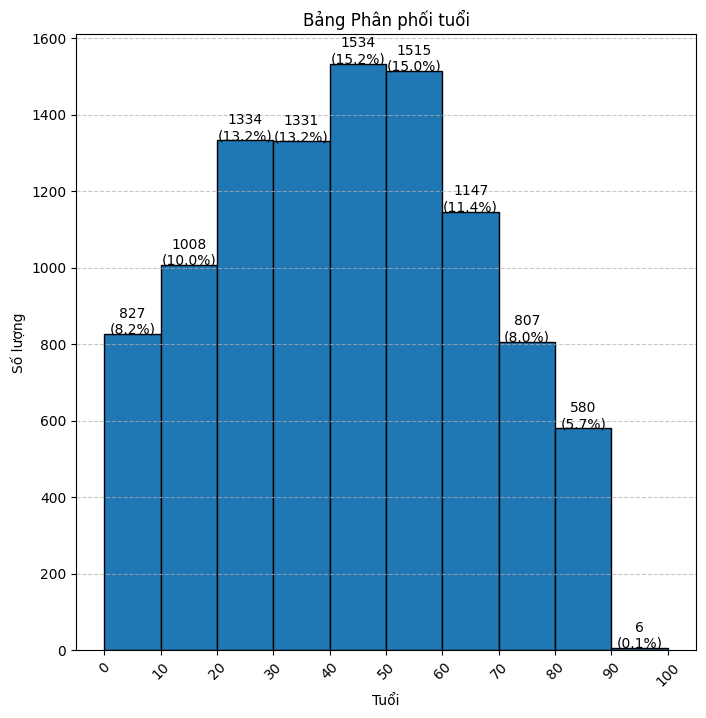

In [ ]:
bin_edges = np.arange(0, 110, 10)

plt.figure(figsize=(8, 8))
counts, _, _ = plt.hist(df['age'].dropna(), bins=bin_edges, edgecolor='black')

total = counts.sum()

for count, x in zip(counts, bin_edges[:-1]):
    percent = (count / total) * 100
    plt.text(x + 5, count + 0.5, f'{int(count)}\n({percent:.1f}%)', ha='center', fontsize=10)

plt.title('Bảng Phân phối tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.xticks(bin_edges, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Bảng phân bố phổ các nhóm tuổi của các mẫu khảo sát

**Bar plot for gender**

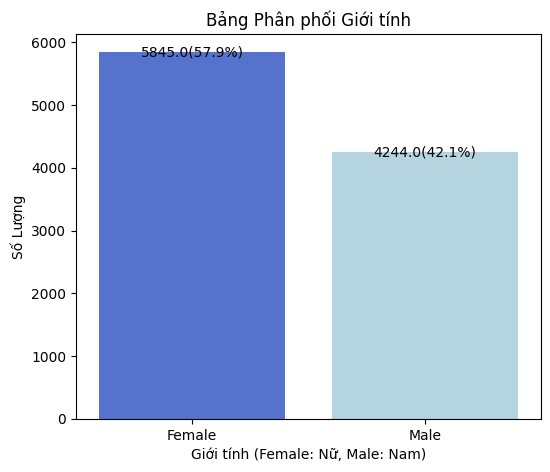

In [ ]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x='gender', data=df, palette=['royalblue', 'lightblue'])

total = len(df)

for p in ax.patches:
    count = p.get_height()
    percent = (count / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, count + 0.5, f'{count}({percent:.1f}%)', ha='center',va = 'center', fontsize=10)

plt.title('Bảng Phân phối Giới tính')
plt.xlabel('Giới tính (Female: Nữ, Male: Nam)')
plt.ylabel('Số Lượng')
plt.show()


Bảng phân bố giới tính của các mẫu khảo sát

**Distribution plot for BMI**

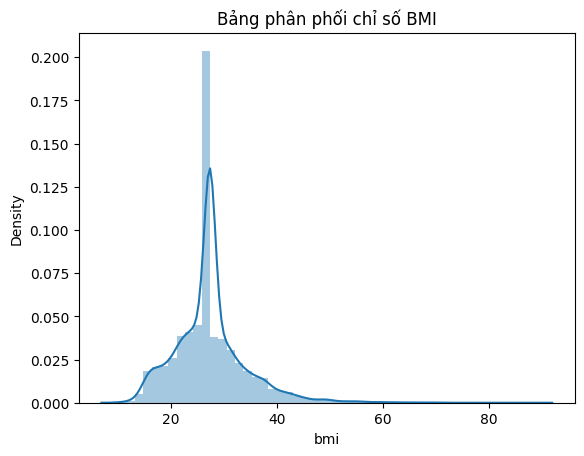

In [ ]:
sns.distplot(df['bmi'], bins=50)
plt.title('Bảng phân phối chỉ số BMI')
plt.show()

**Count plots for binary variables**

Ở Missing value và dataset ta thấy có 3 cột: hypertention, heart_disease và diabetes là những giá trị binary variables.

Count plots for binary variables

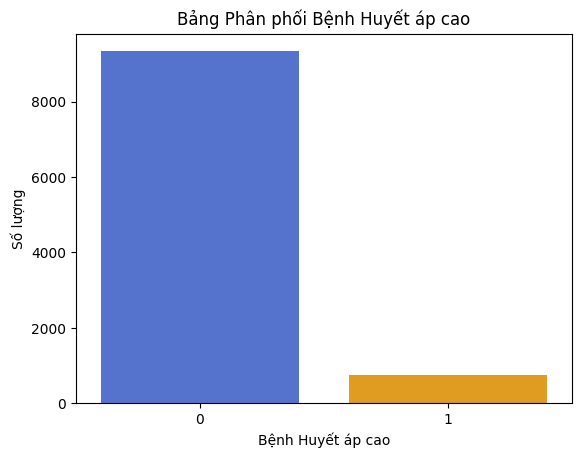

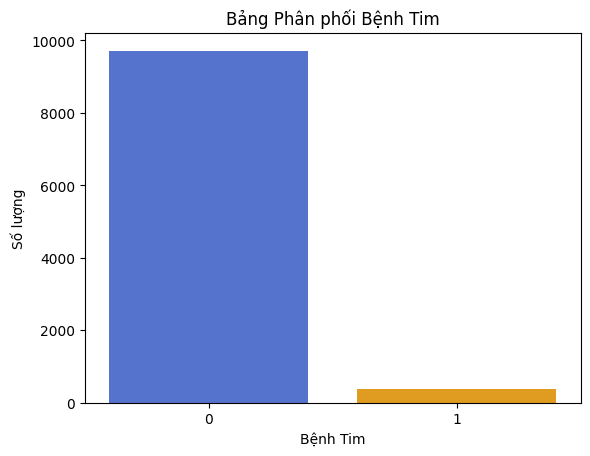

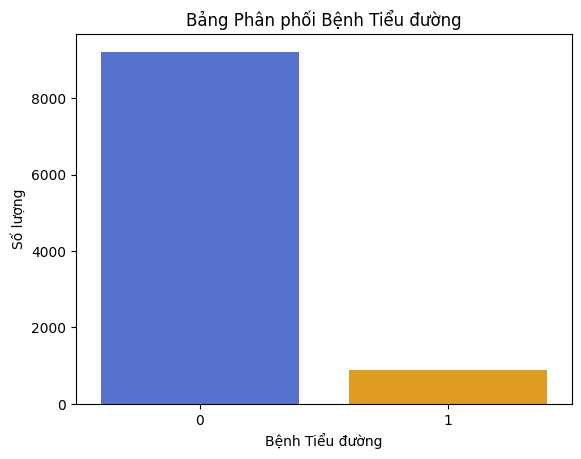

In [ ]:
title_labels = {
    'hypertension': 'Bảng Phân phối Bệnh Huyết áp cao','heart_disease': 'Bảng Phân phối Bệnh Tim','diabetes': 'Bảng Phân phối Bệnh Tiểu đường'
}
column_labels = {
    'hypertension': 'Bệnh Huyết áp cao','heart_disease': 'Bệnh Tim','diabetes': 'Bệnh Tiểu đường'
}
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df,palette=['royalblue', 'orange'])
    plt.title(title_labels[col])
    plt.xlabel(column_labels[col])
    plt.ylabel('Số lượng')
    plt.show()

=> Có sự phân bố không đều giữa 2 giá trị 0 và 1

**Count plot for smoking history**

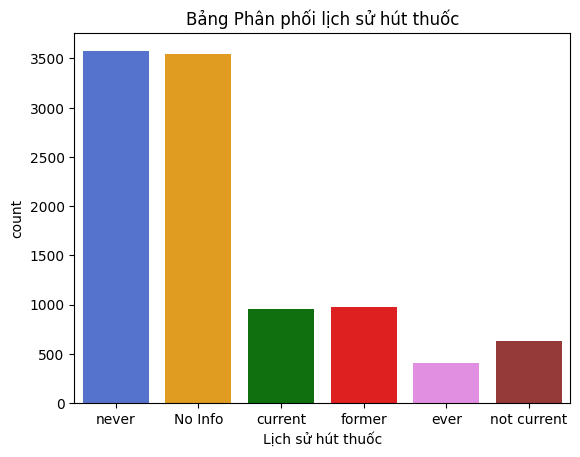

In [ ]:
sns.countplot(x='smoking_history', data=df, palette=['royalblue', 'orange', 'green', 'red','violet', 'brown'])
plt.title('Bảng Phân phối lịch sử hút thuốc')
plt.xlabel('Lịch sử hút thuốc')
plt.show()

never: Không bao giờ hút thuốc

No Info: Không có thông tin

current: Hiện tại đang sử dụng thuốc lá


former: Trước đó có sử dụng thuốc lá

ever: thường xuyên sử dụng thuốc lá

not current: Không phải hiện tại sử dụng thuốc lá

##**3.Phân tích hai biến**

**Boxplot BMI vs Diabetes classification**

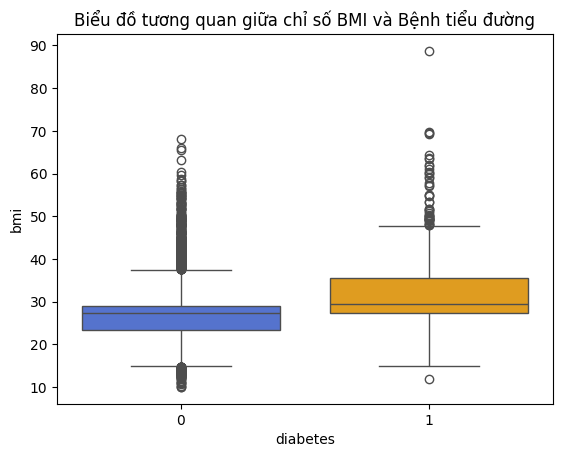

In [ ]:
sns.boxplot(x='diabetes', y='bmi', data=df, palette=['royalblue', 'orange'])
plt.title('Biểu đồ tương quan giữa chỉ số BMI và Bệnh tiểu đường')
plt.show()

**Boxplot Age vs Diabetes classification**

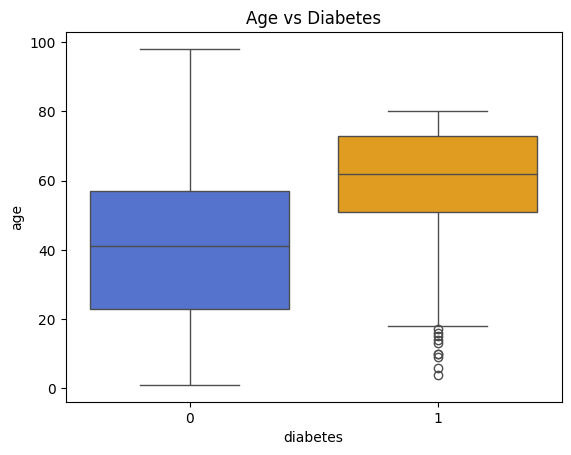

In [ ]:
sns.boxplot(x='diabetes', y='age', data=df,palette=['royalblue', 'orange'])
plt.title('Age vs Diabetes')
plt.show()

**Count plot of gender vs diabetes**

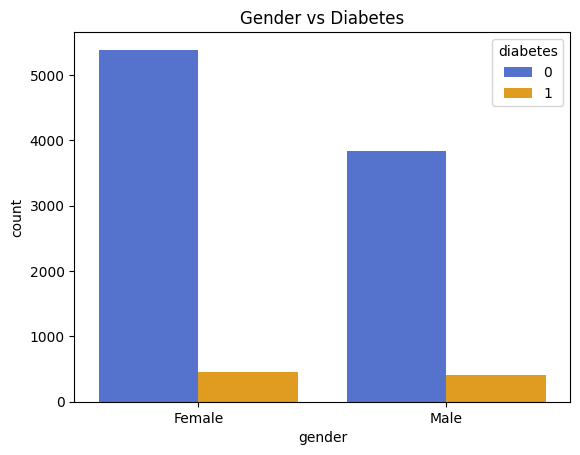

In [ ]:
sns.countplot(x='gender', hue='diabetes', data=df,palette=['royalblue', 'orange'])
plt.title('Gender vs Diabetes')
plt.show()

**Boxplot HbA1c level vs Diabetes classification**

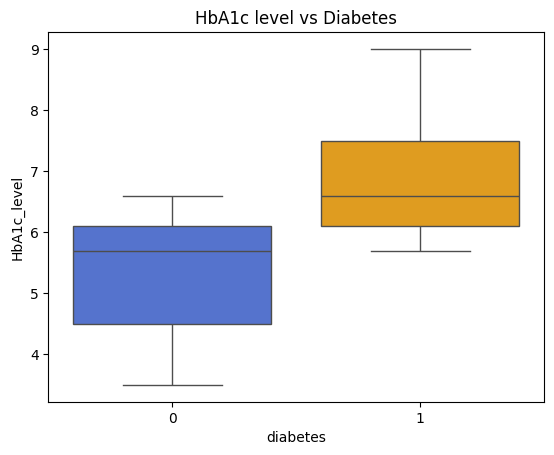

In [ ]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df,palette=['royalblue', 'orange'])
plt.title('HbA1c level vs Diabetes')
plt.show()

**Boxplot blood glucose level vs Diabetes classification**

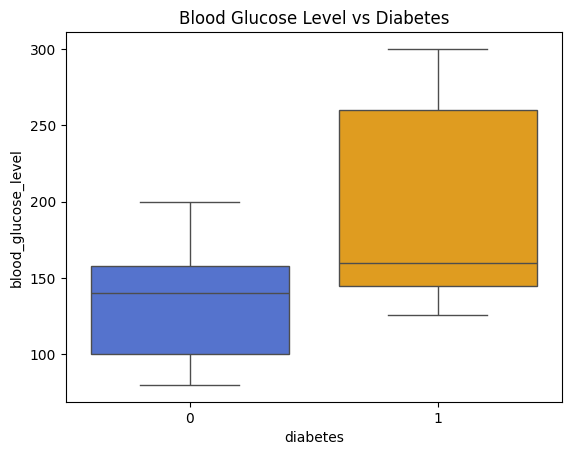

In [ ]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df,palette=['royalblue', 'orange'])
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

##**4.Phân tích đa biến**




**Scatterplot Age vs BMI colored by Diabetes classification**

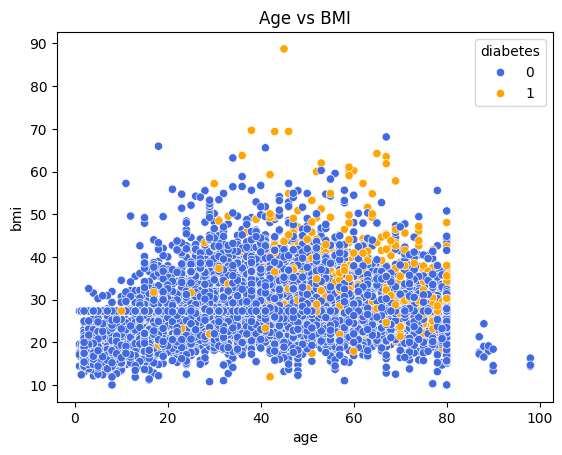

In [ ]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df,palette=['royalblue', 'orange'])
plt.title('Age vs BMI')
plt.show()

**Violin plot of BMI against diabetes classification split by gender**

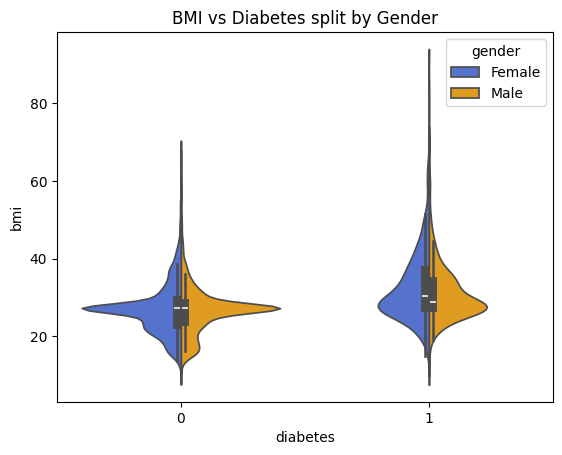

In [ ]:
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df,palette=['royalblue', 'orange'])
plt.title('BMI vs Diabetes split by Gender')
plt.show()

**Interaction between gender, BMI and diabetes**

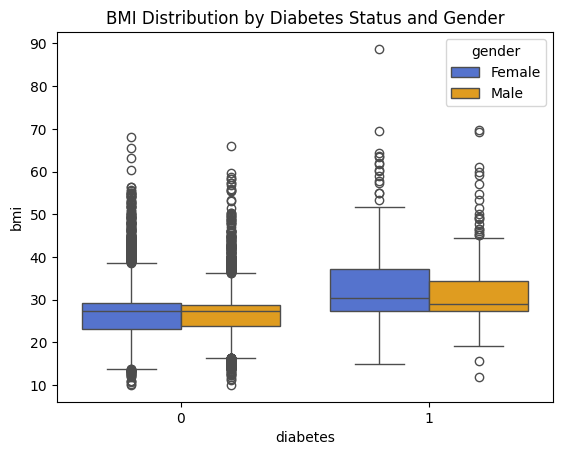

In [ ]:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df,palette=['royalblue', 'orange'])
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

**Interaction between gender, Age and diabetes**

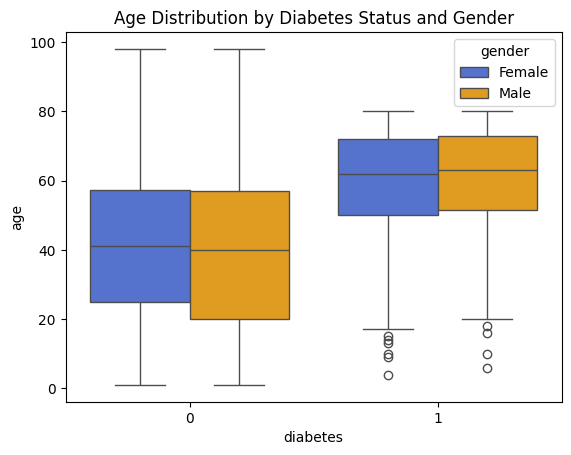

In [ ]:
sns.boxplot(x='diabetes', y='age', hue='gender', data=df,palette=['royalblue', 'orange'])
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

#**Tương quan**

---



##**1.Định dạng lại giá trị**

In [ ]:
print(df['smoking_history'].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']


Kiểm tra các giá trị trong cột smoking_history

In [ ]:
def recategorize_smoking(smoking_history):
    if smoking_history in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_history == 'current':
        return 'current'
    elif smoking_history in ['ever', 'former', 'not current']:
        return 'past_smoker'
    else:
        return 'unknown'
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

In [ ]:
print(df['smoking_history'].unique())

['non-smoker' 'current' 'past_smoker']


Các giá trị trong cột smoking_history khi được chuẩn hóa

In [ ]:
df['smoking_history'].value_counts()

,count
smoking_history,
non-smoker,7125
past_smoker,2011
current,953


In [ ]:
data = df.copy()
data1 = df.copy()

## **2.Mã hóa dữ liệu**

**One Hot Encoding** Là một phương pháp chuyển đổi các biến phân loại thành định dạng nhị phân. Nó tạo ra các cột mới cho từng danh mục, trong đó 1 có nghĩa là danh mục đó có mặt và 0 có nghĩa là không có. Mục đích chính của **One-Hot Encoding** là đảm bảo rằng dữ liệu phân loại có thể được sử dụng hiệu quả trong các mô hình học máy.#geekforgeeks

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)
    return df
# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')
# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

In [ ]:
print(data.columns)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'smoking_history_current', 'smoking_history_non-smoker',
       'smoking_history_past_smoker'],
      dtype='object')


##**3.Ma trận tương quan**

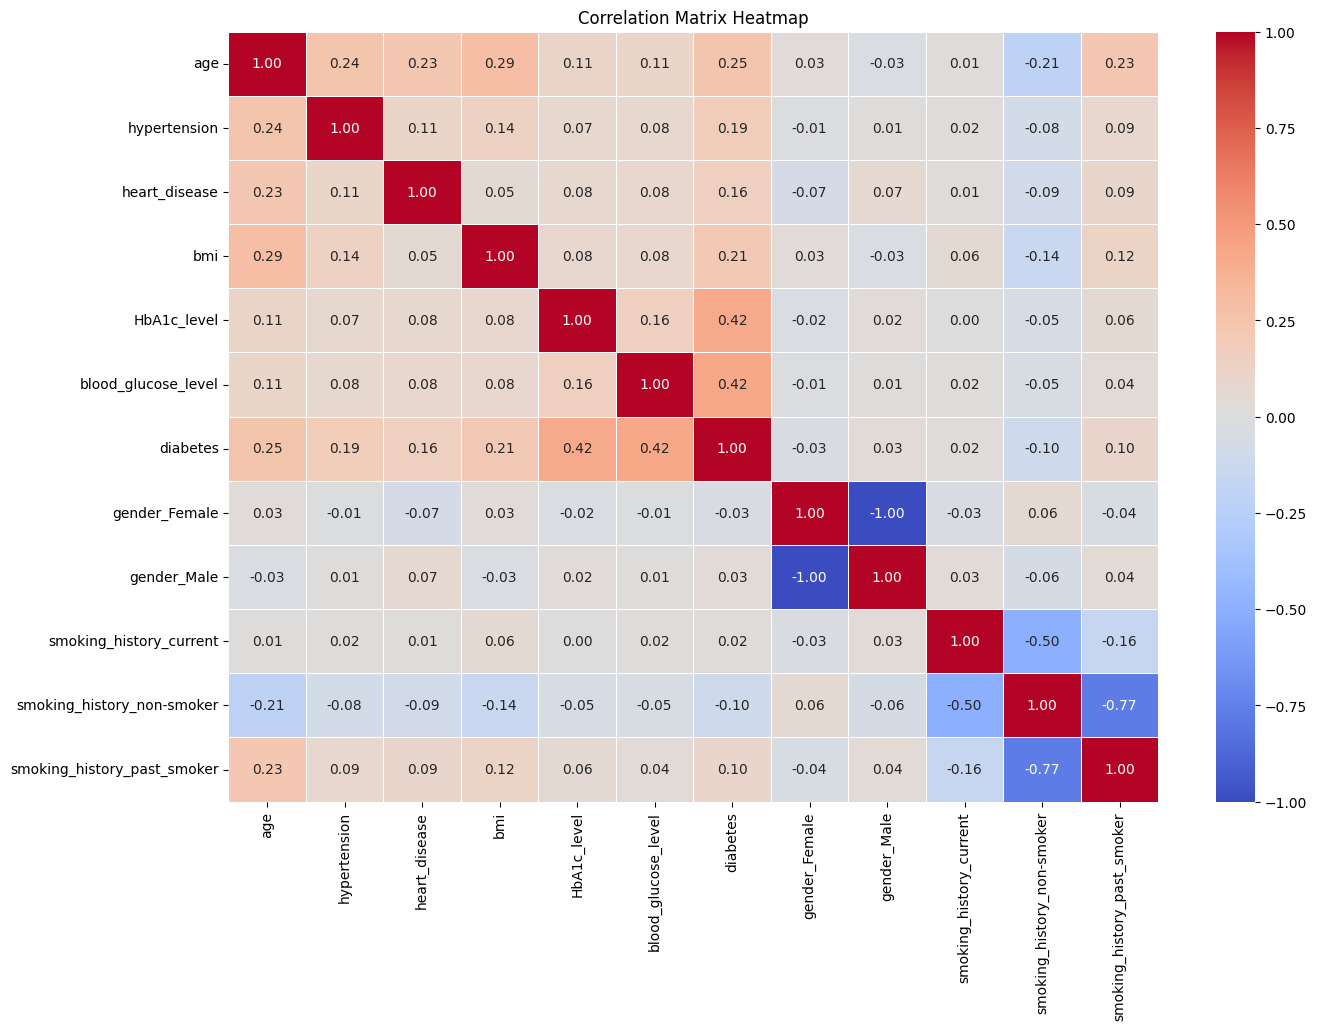

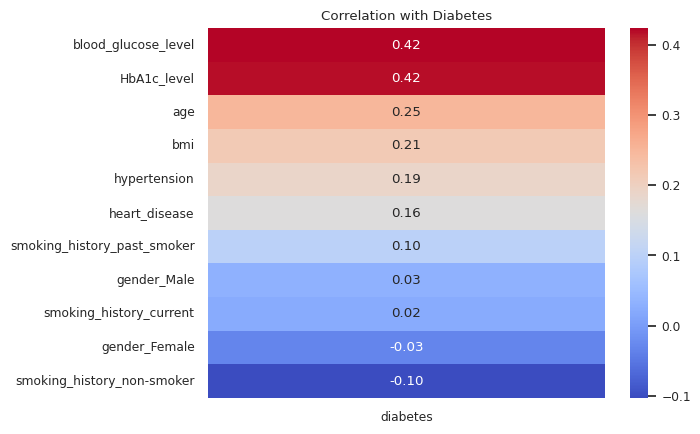

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()
#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

#**Phân tích dự đoán**

---



## **1.Sự mất cân bằng giữa các lớp**

Từ phân tích khám phá dữ liệu(EDA), tập dữ liệu bị mất cân bằng (với 9% trường hợp mắc bệnh tiểu đường và 91% trường hợp còn lại âm tính). Do đó, cần cân bằng dữ liệu để đảm bảo rằng mô hình không bị thiên lệch về phía lớp chiếm đa số. Để làm điều này, kỹ thuật tổng hợp mẫu thiểu số (SMOTE) được sử dụng, giúp tạo ra các mẫu tổng hợp cho lớp thiểu số.

Count plot for the 'diabetes' variable

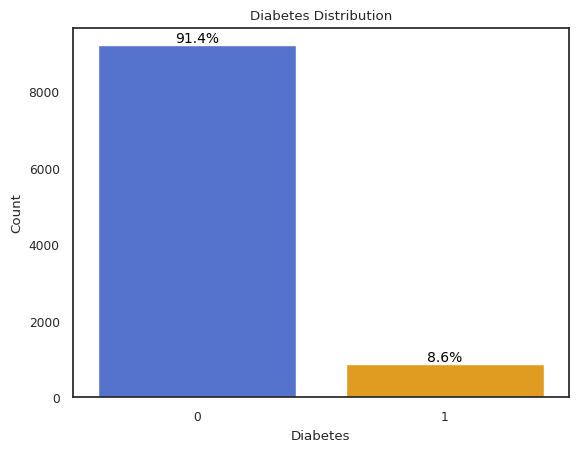

In [ ]:
total = len(df)
ax = sns.countplot(x='diabetes', data=df, palette=('royalblue', 'orange'))

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Diabetes Distribution')
plt.ylabel('Count')
plt.xlabel('Diabetes')
plt.show()


Tái lấy mẫu

In [ ]:
over = SMOTE(sampling_strategy=0.1) #Tăng số lượng mẫu của lớp thiểu số (dương tính với tiểu đường) lên 10% so với lớp đa số
under = RandomUnderSampler(sampling_strategy=0.5) #Giảm số lượng mẫu của lớp đa số xuống còn gấp 2 lần lớp thiểu số

##**2.Tiền xử lý: Scaler**

Tiền xử lý là một bước quan trọng trước khi huấn luyện mô hình. Trong trường hợp này, các đặc trưng số được chuẩn hóa (loại bỏ giá trị trung bình và đưa về phương sai đơn vị), còn các đặc trưng phân loại được mã hóa one-hot. Mặc dù không phải tất cả các mô hình đều yêu cầu chuẩn hóa, nhưng đây thường là một thực hành tốt. Việc mã hóa one-hot là cần thiết để các biến phân loại có thể được mô hình học máy hiểu đúng.

StandardScaler trong thư viện sklearn giả định rằng dữ liệu Y có thể không tuân theo phân phối Gauss (chuẩn), nhưng vẫn biến đổi nó sao cho phân phối của dữ liệu có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.
Nói cách khác, với một vector đặc trưng x, StandardScaler sẽ biến đổi các giá trị theo công thức:

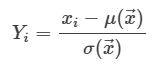
Trong đó:

𝑥
𝑖
​
là phần tử thứ
𝑖
của vector đặc trưng ban đầu.

𝜇
(
𝑥
⃗
)
là giá trị trung bình của vector đặc trưng.

𝜎
(
𝑥
⃗
)
là độ lệch chuẩn của vector đặc trưng.

Dữ liệu đã được biến đổi
𝑌
 (mỗi phần tử
𝑌
𝑖
​) sẽ có các tính chất sau:

mean
(
𝑌
)
=
0 and
std
(
𝑌
)
=
1

Quá trình biến đổi này còn được gọi là chuẩn hóa Z-score (Z-score normalization).

*Định nghĩa bộ tiền xử lý*

In [ ]:
preprocessor = ColumnTransformer( transformers=[('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension' ,'heart_disease']),('cat', OneHotEncoder(), ['gender','smoking_history'])])

In [ ]:
transformed_data = preprocessor.fit_transform(data1)
num_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history'])
new_feature_names = list(num_features) + list(cat_features)

processed_df = pd.DataFrame(transformed_data, columns=new_feature_names)

# Hiển thị kết quả
print(processed_df)

        age   bmi  HbA1c_level  blood_glucose_level  hypertension  \
0      1.69 -0.32         1.00                 0.05         -0.28   
1      0.52 -0.00         1.00                -1.40         -0.28   
2     -0.66 -0.00         0.16                 0.49         -0.28   
3     -0.30 -0.58        -0.48                 0.42         -0.28   
4      1.51 -1.08        -0.67                 0.42          3.52   
...     ...   ...          ...                  ...           ...   
10084  0.34 -0.00        -0.94                -1.16         -0.28   
10085  0.70  0.32         0.26                -1.16         -0.28   
10086 -1.07  0.39        -0.67                -1.16         -0.28   
10087  0.79 -0.16        -0.48                 1.51         -0.28   
10088 -1.47 -0.00         0.26                 0.05         -0.28   

       heart_disease  gender_Female  gender_Male  smoking_history_current  \
0               5.09           1.00         0.00                     0.00   
1              -0

##**3.Tách dữ liệu thành nhãn và biến mục tiêu**

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

*Tạo một pipeline để tiền xử lý dữ liệu, lấy mẫu lại dữ liệu và huấn luyện bộ phân loại*

In [ ]:
clf = imbPipeline(steps=[('preprocessor', preprocessor),('over', over),('under', under),('classifier', RandomForestClassifier())])

*Xây dựng mô hình và tinh chỉnh tham số*

Một pipeline được xây dựng, trong đó trước tiên áp dụng các bước tiền xử lý dữ liệu, sau đó huấn luyện một mô hình trên dữ liệu.

Các siêu tham số của mô hình được tinh chỉnh bằng **GridSearchCV**, phương pháp thực hiện tìm kiếm toàn diện trên các giá trị tham số được chỉ định cho bộ ước lượng. Mô hình có hiệu suất tốt nhất được chọn dựa trên **cross-validation (xác thực chéo)**.

*Định nghĩa tham số và giá trị chúng ta muốn kiếm tra*

In [ ]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5) #Phương pháp tìm kiếm siêu tham số tối ưu bằng cách thử nghiệm nhiều tổ hợp giá trị khác nhau
# Chia dữ liệu để tập huấn và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#
# Train the model
grid_search.fit(X_train, y_train)
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_resampled, y_resampled = over.fit_resample(X_train_processed, y_train)
X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)

# Hiển thị tỷ lệ phần trăm sau khi tái lấy mẫu
resampled_distribution = Counter(y_resampled)
total_resampled = sum(resampled_distribution.values())
resampled_df = pd.DataFrame.from_dict(resampled_distribution, orient='index', columns=['Số lượng'])
resampled_df['Tỷ lệ (%)'] = (resampled_df['Số lượng'] / total_resampled) * 100
print(resampled_df)

# Trực quan hóa phân phối dữ liệu sau khi tái lấy mẫu
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_resampled, palette=['royalblue', 'orange'])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_resampled:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Diabetes Distribution After Resampling")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()


NameError: name 'Counter' is not defined

In [ ]:
print("Số mẫu ban đầu:", len(df))
print("Số mẫu sau train_test_split - Train:", len(y_train), "Test:", len(y_test))
print("Số mẫu sau SMOTE + RandomUnderSampler:", len(y_resampled))


*Diễn giải kết quả*

Kết quả cho thấy các tham số tối ưu cho mô hình **Random Forest** được tìm thấy trong quá trình tinh chỉnh siêu tham số:

**max_depth = 10**: Điều này có nghĩa là độ sâu tối đa của các cây trong rừng là 10 mức. Việc giới hạn độ sâu của cây giúp giảm hiện tượng overfitting. Kết quả này cho thấy một cây có độ phức tạp trung bình hoạt động tốt nhất với dữ liệu. Nếu cây quá nhiều, nó có thể học cả nhiễu của dữ liệu, trong khi nếu quá ít, nó có thể không học được cấu trúc thực sự của dữ liệu.

**min_samples_leaf = 4**: Tham số này quy định rằng mỗi nút lá (nút cuối cùng của cây quyết định, nơi tạo ra dự đoán) phải chứa ít nhất hai mẫu. Giống như max_depth, tham số này giúp kiểm soát overfitting. Bằng cách yêu cầu ít nhất hai mẫu để đưa ra dự đoán, mô hình tránh được việc khớp với các mẫu nhiễu hoặc ngoại lệ trong dữ liệu huấn luyện.

**min_samples_split = 10**: Nghĩa là một nút phải chứa ít nhất hai mẫu thì mới có thể được tách ra (để tạo ra hai nút con). Tham số này cũng giúp kiểm soát overfitting tương tự như min_samples_leaf.

**n_estimators = 200**: Đây là số lượng cây quyết định trong rừng. Thuật toán Random Forest hoạt động bằng cách lấy trung bình dự đoán của nhiều cây quyết định để đưa ra dự đoán cuối cùng, giúp giảm overfitting và độ biến động của mô hình. Trong trường hợp này, có vẻ như 50 cây trong rừng mang lại hiệu suất tốt nhất.

Các tham số này là kết quả của quá trình tinh chỉnh siêu tham số (Hyperparameter tuning) và cung cấp cho chúng ta cái nhìn sâu sắc về cấu trúc của dữ liệu cũng như độ phức tạp của mô hình phù hợp nhất để nắm bắt cấu trúc đó.

Độ sâu cây được giới hạn ở mức vừa phải và các yêu cầu về số lượng mẫu tại mỗi nút cho thấy mô hình đủ phức tạp để nhận diện các mẫu quan trọng trong dữ liệu, nhưng không quá phức tạp đến mức dẫn đến hiện tượng overfitting với nhiễu hoặc ngoại lệ.

Sự cân bằng này rất quan trọng để tạo ra một mô hình có thể tổng quát hóa tốt khi áp dụng vào dữ liệu mới.

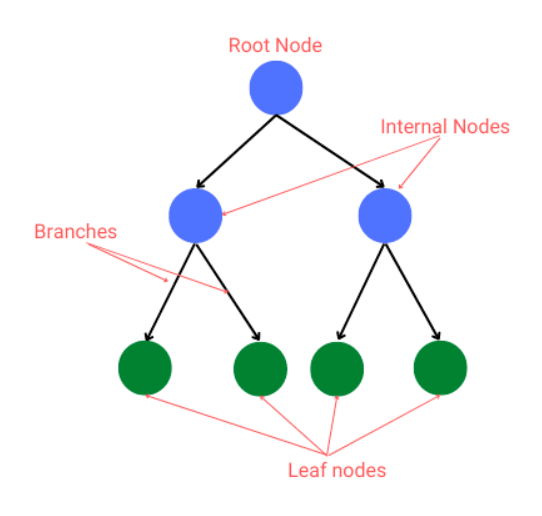

Chuyển đổi kết quả của **GridSearchCV** thành một **DataFrame** và trực quan hóa:

In [ ]:
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Kết quả Tinh chỉnh Siêu tham số')
plt.xlabel('Số lượng bộ ước lượng')
plt.ylabel('Độ chính xác')
plt.show()

##**4.Ma trận nhầm lẫn**

Mô hình đã được huấn luyện sẽ được đánh giá trên tập kiểm tra. Ma trận nhầm lẫn được sử dụng để trực quan hóa hiệu suất của mô hình. Nó hiển thị số lượng dự đoán đúng dương tính, đúng âm tính, sai dương tính và sai âm tính của mô hình.

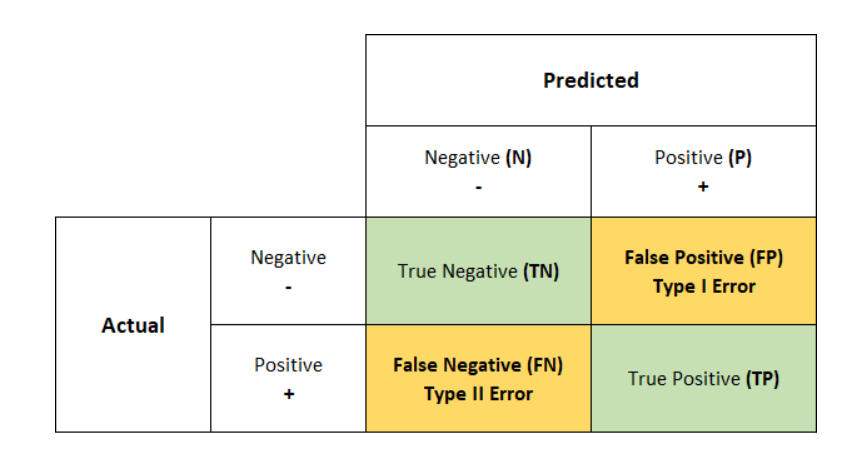

Độ chính xác của mô hình:  0.9519326065411299
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1849
           1       0.67      0.85      0.75       169

    accuracy                           0.95      2018
   macro avg       0.83      0.91      0.86      2018
weighted avg       0.96      0.95      0.95      2018



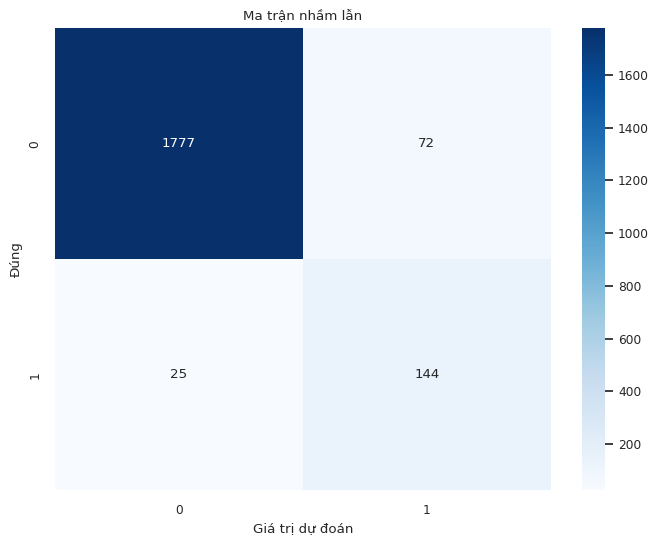

In [ ]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)
# Evaluate the model
print("Độ chính xác của mô hình: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Đúng')
plt.show()

### **Diễn giải kết quả**  

Mô hình **Random Forest** sau khi huấn luyện đã đạt **độ chính xác khoảng 95%**, cho thấy rằng mô hình phân loại đúng khoảng **95%** tổng số trường hợp trong tập kiểm tra.  

### **Phân tích chi tiết theo từng lớp (0 và 1):**  

#### **A | Lớp 0 (Không mắc tiểu đường)**  
- **Độ chính xác (Precision) = 0.98** → Trong số các trường hợp mô hình dự đoán **không mắc tiểu đường**, **98%** thực sự là không mắc bệnh.  
- **Độ nhớ (Recall) = 0.97** → Mô hình phát hiện đúng **97%** tổng số ca không mắc bệnh trong dữ liệu.  

#### **B | Lớp 1 (Mắc tiểu đường)**  
- **Độ chính xác (Precision) = 0.71** → Khi mô hình dự đoán **mắc tiểu đường**, nó đúng khoảng **71%**.  
- **Độ nhớ (Recall) = 0.83** → Mô hình phát hiện đúng **83%** tổng số ca mắc bệnh thực sự.  

### **Đánh giá tổng thể**  
- **F1-score** (trung bình điều hòa giữa Precision và Recall) của mô hình:  
  - **0.98** cho lớp **0** (Không mắc tiểu đường).  
  - **0.77** cho lớp **1** (Mắc tiểu đường).  
- **F1-score trung bình có trọng số ≈ 0.95**, phản ánh hiệu suất tổng thể của mô hình, tương đồng với **độ chính xác 96%**.  

💡 **Nhận xét:**  
Mô hình hoạt động rất tốt trong việc phát hiện **người không mắc tiểu đường** nhưng còn hạn chế trong việc **phát hiện chính xác người mắc tiểu đường** (Precision thấp cho lớp 1). Điều này có thể do dữ liệu mất cân bằng hoặc cần điều chỉnh thêm siêu tham số.

##**5.Tầm quan trọng của nhãn**

Cuối cùng, tầm quan trọng của từng nhãn được tính toán. Đây là tổng mức giảm độ tinh khiết của nút (được trọng số bởi xác suất đạt đến nút đó, ước lượng bằng tỷ lệ mẫu đạt đến nút đó) và được tính trung bình trên tất cả các cây trong mô hình tập hợp.

Tầm quan trọng của nhãn cung cấp cái nhìn sâu sắc về những nhãn nào hữu ích nhất trong việc đưa ra dự đoán. Các nhãn được xếp hạng theo mức độ quan trọng của chúng

                      Đặc trưng  Độ quan trọng
2                   HbA1c_level           0.42
3           blood_glucose_level           0.32
0                           age           0.13
1                           BMI           0.07
4                  hypertension           0.03
5                 heart_disease           0.01
9    smoking_history_non-smoker           0.01
10  smoking_history_past_smoker           0.00
7                   gender_Male           0.00
6                 gender_Female           0.00
8       smoking_history_current           0.00


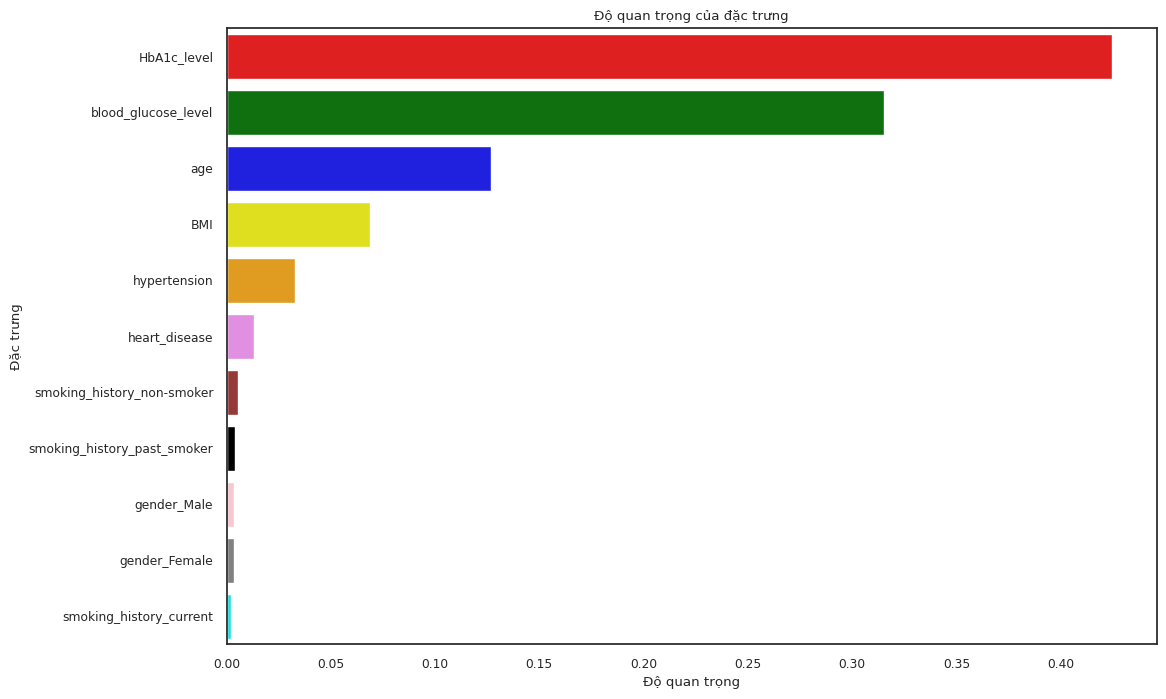

In [ ]:
# Sau khi huấn luyện mô hình, nhập tên các nhãn.
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))
# Thêm tên nhãn dưới dạng số.
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns
# Lấy độ quan trọng của các nhãn
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
# Biểu diễn độ quan trọng của các nhãn
importance_df = pd.DataFrame({'Đặc trưng': feature_names, 'Độ quan trọng': importances})
importance_df = importance_df.sort_values('Độ quan trọng', ascending=False)
print(importance_df)
plt.figure(figsize=(12, 8))
sns.barplot(x='Độ quan trọng', y='Đặc trưng', data=importance_df,palette = [
    "#FF0000",  # Red
    "#008000",  # Green
    "#0000FF",  # Blue
    "#FFFF00",  # Yellow
    "#FFA500",  # Orange
    "#EE82EE",  # Violet
    "#A52A2A",  # Brown
    "#000000",  # Black
    "#FFC0CB",  # Pink
    "#808080",  # Gray
    "#00FFFF"   # Cyan (thêm màu để đủ 11 màu)
])
plt.title('Độ quan trọng của đặc trưng')
plt.show()

Kết quả về tầm quan trọng của các nhãn cung cấp cái nhìn sâu sắc về những yếu tố có ảnh hưởng lớn nhất trong việc dự đoán bệnh tiểu đường bằng mô hình Random Forest. Mức độ quan trọng của một nhãn được tính dựa trên mức độ mà các nút trong cây sử dụng nhãn đó giúp giảm độ nhiễu trên toàn bộ rừng cây.  

Dưới đây là những phát hiện chính từ kết quả tầm quan trọng của nhãn:  

**HbA1c_level** là nhãn quan trọng nhất với mức độ quan trọng là **0.43**. HbA1c là chỉ số đo lượng đường trong máu trung bình trong vòng 2 đến 3 tháng qua, vì vậy không có gì ngạc nhiên khi đây là một yếu tố dự báo quan trọng đối với bệnh tiểu đường.  

**blood_glucose_level** là nhãn quan trọng thứ hai với mức độ quan trọng là **0.3**. Điều này phù hợp với kiến thức y khoa, vì mức đường huyết là yếu tố trực tiếp được sử dụng để chẩn đoán bệnh tiểu đường.  

**Age** là nhãn quan trọng thứ ba với mức độ quan trọng là **0.13**. Đã có nhiều nghiên cứu cho thấy nguy cơ mắc bệnh tiểu đường loại 2 tăng lên theo độ tuổi.  

**BMI** đứng thứ tư với mức độ quan trọng **0.07**. Chỉ số khối cơ thể (BMI) là một yếu tố nguy cơ quan trọng của bệnh tiểu đường và đã được ghi nhận trong nhiều tài liệu y khoa.  

Các đặc trưng khác như **hypertension** (tăng huyết áp) và **heart_disease** (bệnh tim) có mức độ quan trọng lần lượt là **0.02** và **0.01**, cho thấy rằng những bệnh lý này có thể có ảnh hưởng đến nguy cơ mắc bệnh tiểu đường, nhưng không quan trọng bằng bốn yếu tố hàng đầu.  

**Lịch sử hút thuốc** (*smoking_history_non-smoker*, *smoking_history_past_smoker*, *smoking_history_current*) và **giới tính** (*gender_Female*, *gender_Male*) được đánh giá là có mức độ quan trọng tối thiểu hoặc bằng không trong mô hình. Điều này có thể do nhiều nguyên nhân, chẳng hạn như những yếu tố này không có ảnh hưởng đáng kể đến sự phát triển của bệnh tiểu đường, hoặc có thể do cách dữ liệu được thu thập và cấu trúc.

In [ ]:
new_X_test = pd.DataFrame([{
    'gender': 'Male',
    'age': 73,
    'hypertension': 0,
    'heart_disease': 0,
    'smoking_history': 'non-smoker',
    'bmi': 25.91,
    'HbA1c_level': 9,
    'blood_glucose_level': 160
}])
new_y_pred = grid_search.predict(new_X_test)

print("Dự đoán cho dữ liệu mới:", new_y_pred)


Dự đoán cho dữ liệu mới: [1]
